In [ ]:
!pip install ragas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
import os


drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Capstone')
!ls

Mounted at /content/drive
'02-19 - Literature Review Mini-Deliverable.gdoc'	     evaluation_set_rag_responses.pickle
'02-26 - Capstone Project Proposal.gdoc'		     llama-2-7b.Q4_K_M.gguf
'03-04 - Software Tools Mini-Deliverable.gdoc'		    'LLM Inference Test.ipynb'
'03-11 - Data Leakage Plan Mini-Deliverable.gdoc'	     models
'03-11 - First Slack Stand-up Reports and Responses.gdoc'    original_syllabi
'03-17 - Mentor Check-In.gdoc'				     package_installation.ipynb
'03-18 - Report Outline Mini-Deliverable.gdoc'		     packages
'03-25 - Second Slack Stand-up Reports and Responses.gdoc'   Pipfile
'03-25 - Visuals Mini-Deliverable.gdoc'			    'Pipfile (1)'
'04-01 - Revised Outline Mini-Deliverable???.gdoc'	     Pipfile.lock
'04-08 - GitHub Repository Mini-Deliverable.gdoc'	    'Project Tracker.gdoc'
'04-15 - Capstone Project Pre-Flight Checklist.gdoc'	     syllabus_loader_embeddings
'04-16 - Third Slack Stand-up Reports and Responses.gdoc'    syllabus_loader_embeddings_ORIGINAL
'04-22 - 

In [ ]:
import pickle


with open(f"./evaluation_set_rag_responses.pickle", 'rb') as handle:
    rag_responses = pickle.load(handle)

rag_responses

{'question': ['Tell me what I need to turn in for the capstone project.',
  'Which class involves time series analysis?',
  'Who teaches the SQL and Databases class?'],
 'contexts': [['The following context is from Capstone - SIADS 699, Course Syllabus For SIADS 699: Course Overview and Prerequisites The Capstone is a project-based course in which students propose and build end-to-end data science projects in their domains of interest. Students are asked to demonstrate mastery of data science concepts and methods from their MADS training and produce a creative, original, and technically rigorous portfolio piece. Projects will be supervised by instructors with regular peer review. The core of this class is a group data science project which will be independently designed and executed by students. The intention is to create a resume-worthy portfolio project in a format that is ready to share and present with the broader community of data science professionals. The following are prerequis

In [ ]:
import os
from google.colab import userdata


os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:
import ragas
from datasets import Dataset


test_data = Dataset.from_dict(rag_responses)

metrics = [ragas.metrics.context_precision, ragas.metrics.context_recall, ragas.metrics.faithfulness, ragas.metrics.answer_relevancy]

results = ragas.evaluate(test_data, metrics)

results.to_pandas()

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

,question,contexts,answer,ground_truth,context_precision,context_recall,faithfulness,answer_relevancy
0,Tell me what I need to turn in for the capston...,[The following context is from Capstone - SIAD...,You will need to submit a project proposal an...,\nFinal Project Submission including:\n A r...,0.804167,1.0,1.0,0.869454
1,Which class involves time series analysis?,[The following context is from Health Analytic...,Data Mining II - SIADS 632,"Data Mining II, SIADS 632 includes a particula...",0.500000,1.0,0.0,0.795345
2,Who teaches the SQL and Databases class?,[The following context is from SQL and Databas...,The instructor for this class is Graham Hukil...,The primary instructor for SQL and Databases i...,1.000000,1.0,1.0,0.891373


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = results.to_pandas()

In [ ]:
df

,question,contexts,answer,ground_truth,context_precision,context_recall,faithfulness,answer_relevancy
0,Tell me what I need to turn in for the capston...,[The following context is from Capstone - SIAD...,You will need to submit a project proposal an...,\nFinal Project Submission including:\n A r...,0.804167,1.0,1.0,0.869454
1,Which class involves time series analysis?,[The following context is from Health Analytic...,Data Mining II - SIADS 632,"Data Mining II, SIADS 632 includes a particula...",0.500000,1.0,0.0,0.795345
2,Who teaches the SQL and Databases class?,[The following context is from SQL and Databas...,The instructor for this class is Graham Hukil...,The primary instructor for SQL and Databases i...,1.000000,1.0,1.0,0.891373


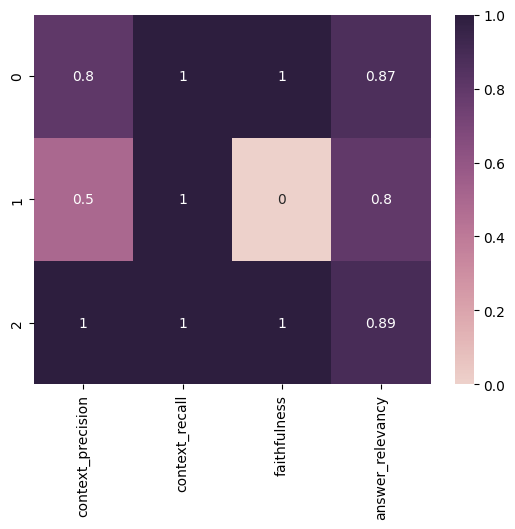

In [ ]:
sns.heatmap(df[["context_precision", "context_recall", "faithfulness", "answer_relevancy"]], annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

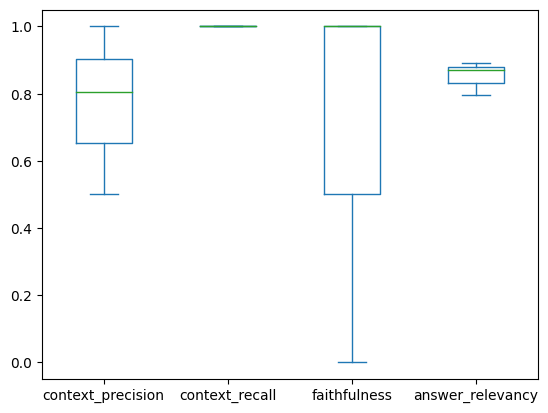

In [ ]:
df[["context_precision", "context_recall", "faithfulness", "answer_relevancy"]].plot(kind='box')
plt.show()